In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# To rename fair_type
fair_type_to_alg = {
    'FairType.DET': 'DetALG',
    'FairType.PROB': 'ProbALG',
    'FairType.ROBUST': 'RobustALG',
}
def clean_dataset_name(name):
    if 'census' in name:
        return 'Census1990' 
    if 'adult' in name:
        return 'Adult'
    if 'bank' in name:
        return 'Bank'

def legend_string(row):
    fair_type = row
    return f"{fair_type}"
def make_baseline_violation_plots(budgets_csvs, exp_name):
    """Make plots for increasing m values. Handles probabilistic and
    deterministic baselines as well as robust fair clustering.
    
    budgets_csv (string): paths to corresponding csv files
    exp_name (string): prepended to plots names to save files 
    """
    col_rename = {
        'budgetViolation': 'fairness violation',
        'name': 'dataset',
        'FairType': 'algorithm',
    }
    df_m = pd.concat([pd.read_csv(path) for path in budgets_csvs])
    df_m.rename(col_rename, inplace=True, axis=1)
    df_m['dataset'] = df_m['dataset'].apply(clean_dataset_name)
    df_m['algorithm'] = df_m['algorithm'].apply(lambda x: fair_type_to_alg[x])
    id_vars = ['m', 'algorithm', 'dataset', 'num_colors']
    melt_df_m = pd.melt(df_m, id_vars=id_vars, value_vars=['fairness violation', 'objective'])
    melt_df_m['hue'] = melt_df_m['dataset'] + ', ' + melt_df_m['algorithm']
    facet_kws = {'sharey': False,}
    line_kwargs = {
        'linewidth': 2,
        'markersize': 8,
    } 
    sns.set_style('whitegrid')
    with sns.plotting_context(
        'paper',
        font_scale=2,
        #   rc={"legend.fontsize":1},
    ):
        f = sns.relplot(data=melt_df_m, kind='line', x='m', y='value', marker='o', 
                        row='variable',
                        alpha=.6,
                        palette='CMRmap',
                        hue='algorithm', 
                        col = 'dataset',
                        height=4,
                        aspect=2,
                        facet_kws=facet_kws,
                        **line_kwargs,
        ) 
        f.set_xlabels(r'$m/n$')
        for i in range(2):
            for j in range(3):
                if i == 0:
                    title = f.axes[i,j].get_title().split('dataset =')[1]
                else:
                    title = ''
                f.axes[i,j].set_title(title)
        f.axes[0,0].set_ylabel(r'fairness violation ($\lambda$)')
        f.axes[1,0].set_ylabel(r'$k$-center objective')

        f.savefig(f'../figures/{exp_name}_m_vs_fairvio.png', dpi=500)

    return df_m


In [51]:
# csvs with data for baselines and our algorithm 
def csv_path(exp_dir, csv_file):
    """Return the path to the desired csv file.
    
    Arguments
    ---------
    exp_dir (string)
        name of the experiment (folder), e.g., small_m
    csv_file (string)
        the path of the csv file without parent directories
    """
    if 'ROBUST' in csv_file or 'PROB' in csv_file:
        return f'../experiments/{exp_dir}/Results/{csv_file}' 
    else:
        return f'../experiments/{exp_dir}/BaselineViolations/{csv_file}'

small_m_budgets_csv = [csv_path('small_m', csv_file) for csv_file in 
    [
        # 'DET_adult_sex_kcenter_32561_normalized_p99.csv',
        # 'DET_census1990_ss_age_3_classes_kcenter_32561_normalized_p99.csv',
        # 'DET_bank_binary_marital_kcenter_4521_normalized_p99.csv',
        # 'PROB_adult_sex_kcenter_32561_normalized_p99.csv',
        # 'PROB_bank_binary_marital_kcenter_4521_normalized_p99.csv',
        # 'ROBUST_adult_sex_kcenter_32561_normalized_p99.csv',
        # 'ROBUST_bank_binary_marital_kcenter_4521_normalized_p99.csv',
        # 'ROBUST_census1990_ss_age_3_classes_kcenter_32561_normalized_p99.csv',
        'DET_adult_sex_kcenter_32561_normalized_p999.csv',
        'DET_bank_binary_marital_kcenter_4521_normalized_p999.csv',
        'DET_census1990_ss_age_3_classes_kcenter_32561_normalized_p999.csv',
        'PROB_adult_sex_kcenter_32561_normalized_p99.csv',
        'PROB_bank_binary_marital_kcenter_4521_normalized_p99.csv',
        'ROBUST_adult_sex_kcenter_32561_normalized_p99.csv',
        'ROBUST_bank_binary_marital_kcenter_4521_normalized_p99.csv',
        'ROBUST_census1990_ss_age_3_classes_kcenter_32561_normalized_p99.csv',
    ]
]
large_m_budgets_csv = [csv_path('large_m', csv_file) for csv_file in 
    [
        'DET_adult_sex_kcenter_32561_normalized_p9.csv',
        'DET_bank_binary_marital_kcenter_4521_normalized_p9.csv',
        'DET_census1990_ss_age_3_classes_kcenter_32561_normalized_p9.csv',
        'PROB_adult_sex_kcenter_32561_normalized_p9.csv',
        'PROB_bank_binary_marital_kcenter_4521_normalized_p9.csv',
        'ROBUST_adult_sex_kcenter_32561_normalized_p9.csv',
        'ROBUST_bank_binary_marital_kcenter_4521_normalized_p9.csv',
        'ROBUST_census1990_ss_age_3_classes_kcenter_32561_normalized_p9.csv',
    ]
]

In [ ]:
testdf = make_baseline_violation_plots(small_m_budgets_csv, 'small_m')

In [ ]:
testdf2 = make_baseline_violation_plots(large_m_budgets_csv, 'euclidean_wide_large_m')

In [ ]:
# Make diabetes dataset plots
diabetes_csvs = [csv_path('diabetes_large_m', csv_file) for csv_file in 
    [
       'DET_diabetes_kcenter_20000_normalized_p99.csv',
       'PROB_diabetes_kcenter_20000_normalized_p9.csv',
       'ROBUST_diabetes_kcenter_20000_normalized_p9.csv',
    ]
]
col_rename = {
    'budgetViolation': 'fairness violation',
    'name': 'dataset',
    'FairType': 'algorithm',
}
df_m = pd.concat([pd.read_csv(path) for path in diabetes_csvs])
df_m.rename(col_rename, inplace=True, axis=1)
df_m['dataset'] = df_m['dataset'].apply(clean_dataset_name)
df_m['algorithm'] = df_m['algorithm'].apply(lambda x: fair_type_to_alg[x])
id_vars = ['m', 'algorithm', 'dataset', 'num_colors']
melt_df_m = pd.melt(df_m, id_vars=id_vars, value_vars=['fairness violation', 'objective'])
melt_df_m['hue'] = melt_df_m['dataset'] + ', ' + melt_df_m['algorithm']
facet_kws = {'sharey': False,}
line_kwargs = {
    'linewidth': 2,
    'markersize': 8,
} 
sns.set_style('whitegrid')
with sns.plotting_context(
    'paper',
    font_scale=2,
    #   rc={"legend.fontsize":1},
):
    f = sns.relplot(data=melt_df_m, kind='line', x='m', y='value', marker='o', 
                    row='variable',
                    alpha=.6,
                    palette='CMRmap',
                    hue='algorithm', 
                    height=4,
                    aspect=2,
                    facet_kws=facet_kws,
                    **line_kwargs,
    ) 
    f.set_xlabels(r'$m/n$')
    # title = f.axes[i,j].get_title().split('dataset =')[1]
    # f.axes[0,0].set_title(title)
    f.axes[0,0].set_ylabel(r'fairness violation ($\lambda$)')
    f.axes[1,0].set_ylabel(r'$k$-center objective')

    exp_name = 'diabetes_large_m'
    f.savefig(f'../figures/{exp_name}_m_vs_fairvio.png', dpi=500)

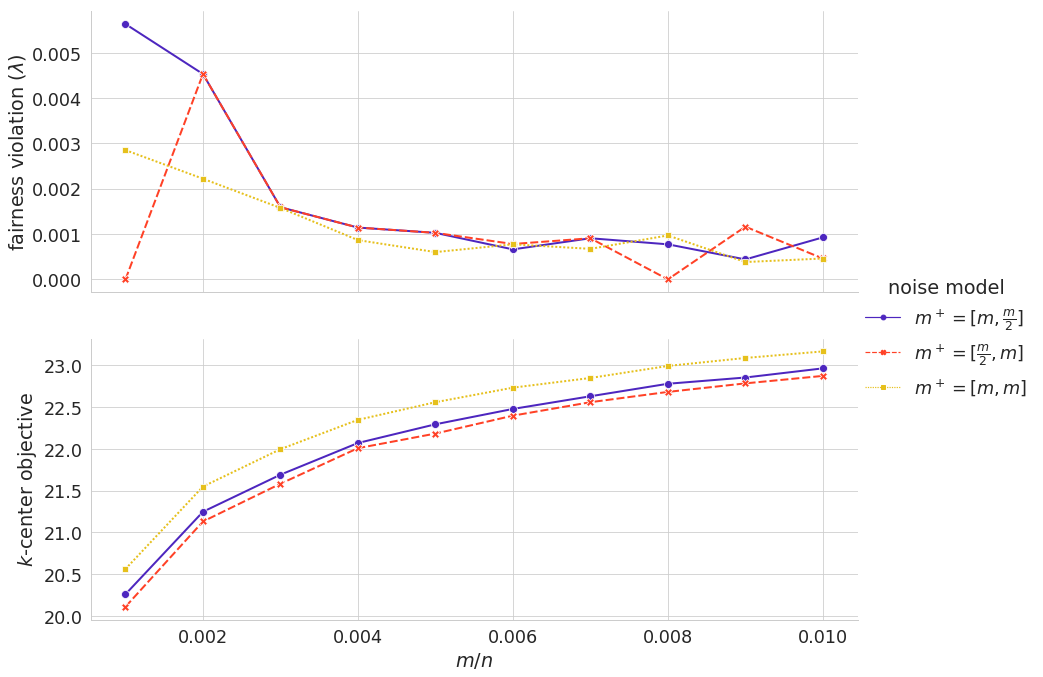

In [6]:
error_violation_csvs =[
    '../experiments/noise_models/ErrModelsViolations/ROBUST_color_0_gains_more_bank_binary_marital_kcenter_4521_normalized_p99.csv',
    '../experiments/noise_models/ErrModelsViolations/ROBUST_color_1_gains_more_bank_binary_marital_kcenter_4521_normalized_p99.csv',
    '../experiments/noise_models/ErrModelsViolations/ROBUST_equally_noisy_bank_binary_marital_kcenter_4521_normalized_p99.csv',
]
noise_models_df = pd.concat([pd.read_csv(df_csv) for df_csv in error_violation_csvs])
col_rename = {"violation": "fairness violation", "noise_model": "noise model", }
noise_models_df.rename(col_rename, inplace=True, axis=1)

noise_models_df["noise model"] = noise_models_df["noise model"].apply(
    lambda name: {
        "color_0_gains_more": r"$m^+ = [m, \frac{m}{2}]$",
        "color_1_gains_more": r"$m^+ = [\frac{m}{2}, m]$",
        "equally_noisy": r"$m^+ = [m, m]$",
    }[name]
)
id_vars = ['m', 'noise model']
value_vars = ['fairness violation', 'objective']
melted = pd.melt(noise_models_df, id_vars, value_vars)
facet_kws = {'sharey': False}
line_kwargs = {
    'linewidth': 2,
    'markersize': 8,
} 
sns.set_style('whitegrid')
with sns.plotting_context(
    'paper',
    font_scale=2,
    #   rc={"legend.fontsize":1},
):
    f = sns.relplot(
        data=melted,
        kind="line",
        x="m",
        hue="noise model",
        style="noise model",
        y="value",
        row="variable",
        markers=True,
        palette="CMRmap",
        aspect=2.5,
        facet_kws=facet_kws,
        **line_kwargs
    )
    f.set_xlabels(r'$m/n$')
    f.axes[0,0].set_title('')
    f.axes[0,0].set_ylabel(r'fairness violation ($\lambda$)')
    f.axes[1,0].set_title('')
    f.axes[1,0].set_ylabel(r'$k$-center objective')
    f.savefig("../figures/euclidean_noise_models.png", dpi=400)

In [61]:
runtime_csvs = [
    "../experiments/large_m/Results/DET_adult_sex_kcenter_32561_normalized_p9.csv",
    "../experiments/large_m/Results/DET_bank_binary_marital_kcenter_4521_normalized_p9.csv",
    "../experiments/large_m/Results/DET_census1990_ss_age_3_classes_kcenter_32561_normalized_p9.csv",
    "../experiments/large_m/Results/PROB_adult_sex_kcenter_32561_normalized_p9.csv",
    "../experiments/large_m/Results/PROB_bank_binary_marital_kcenter_4521_normalized_p9.csv",
    "../experiments/large_m/Results/ROBUST_adult_sex_kcenter_32561_normalized_p9.csv",
    "../experiments/large_m/Results/ROBUST_bank_binary_marital_kcenter_4521_normalized_p9.csv",
    "../experiments/large_m/Results/ROBUST_census1990_ss_age_3_classes_kcenter_32561_normalized_p9.csv",
]

def make_runtime_plots(budgets_csvs, exp_name):
    """Make plots for experiments runtimes. Handles probabilistic and
    deterministic baselines as well as robust fair clustering.
    
    budgets_csv (string): paths to corresponding csv files
    exp_name (string): prepended to plots names to save files 
    """
    col_rename = {
        'budgetViolation': 'fairness violation',
        'name': 'dataset',
        'FairType': 'algorithm',
        'Run_Time': 'time in seconds',
    }
    dfs =[pd.read_csv(path) for path in budgets_csvs]
    # Remove the many duplicates for the probabilistic baseline's sampling of color realizations
    for i in range(len(dfs)):
        if (dfs[i]['FairType'] == 'FairType.PROB').any():
            dfs[i].drop_duplicates(['Run_Time', 'm'], inplace=True)
            assert len(dfs[i]) < 20
    df_m = pd.concat(dfs)
    df_m.rename(col_rename, inplace=True, axis=1)
    df_m['dataset'] = df_m['dataset'].apply(clean_dataset_name)
    df_m['algorithm'] = df_m['algorithm'].apply(lambda x: fair_type_to_alg[x])
    id_vars = ['m', 'algorithm', 'dataset', 'num_colors']
    value_vars = ['time in seconds']
    melt_df_m = pd.melt(df_m, id_vars=id_vars, value_vars=value_vars)
    # melt_df_m['hue'] = melt_df_m['dataset'] + ', ' + melt_df_m['algorithm']
    sns.set_style('whitegrid')
    with sns.plotting_context(
        'paper',
        font_scale=1.5,
    ):
        f = sns.catplot(
            data=melt_df_m,
            kind="swarm",
            x="algorithm",
            y="value",
            palette="CMRmap",
            hue="algorithm",
            col="dataset",
            sharey=False,
            s=7,
        )
        for i in range(1):
            for j in range(3):
                if i == 0:
                    title = f.axes[i,j].get_title().split('dataset =')[1]
                else:
                    title = ''
                f.axes[i,j].set_title(title)
        f.axes[0,0].set_ylabel('')
        f.set_ylabels('time in seconds')
        f.savefig(f'../figures/{exp_name}.png', dpi=500)

        melt_df_no_bank_or_det = melt_df_m[
            melt_df_m['algorithm'].isin(['RobustALG', 'ProbALG']) &
            (melt_df_m['dataset'] != 'Bank')
        ]
        f2 = sns.relplot(
            data=melt_df_no_bank_or_det,
            y='value',
            x='m',
            kind='line',
            hue='algorithm',
            col='dataset',
            palette="CMRmap",
            facet_kws={
                'sharey': False,
            }
        )
        f2.set_ylabels('time in seconds')
        f2.set_xlabels(r'$m/n$')
        for i in range(1):
            for j in range(2):
                if i == 0:
                    title = f2.axes[i,j].get_title().split('dataset =')[1]
                else:
                    title = ''
                f2.axes[i,j].set_title(title)
        f2.savefig(f'../figures/{exp_name}_with_m.png', dpi=500)

    return df_m

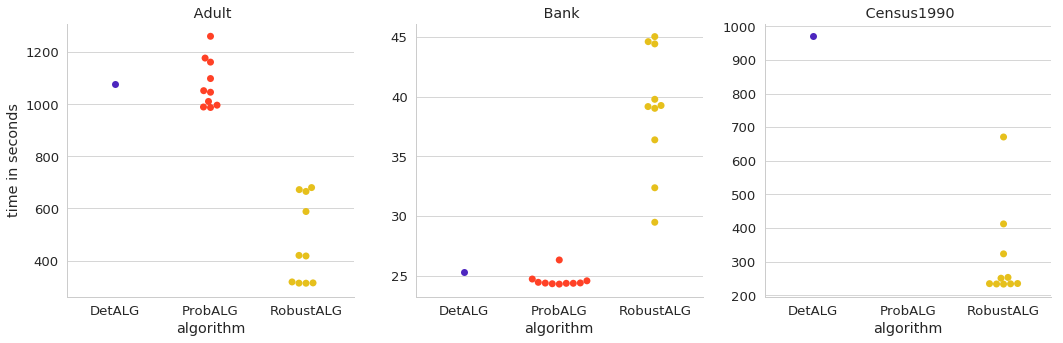

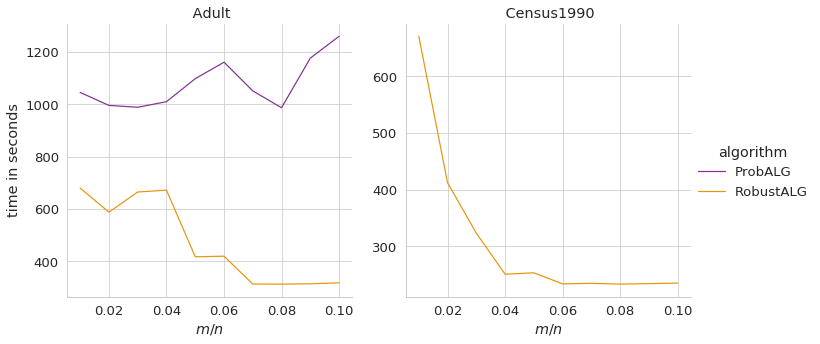

In [62]:
runtimes_df = make_runtime_plots(runtime_csvs, 'runtime_large_m')

In [44]:
k5_10_csvs = [
    '../experiments/k5_max_points/Results/robust_diabetes_kcenter_23000_normalized_p995.csv',
    '../experiments/k5_max_points/Results/prob_diabetes_kcenter_23000_normalized_p995.csv',
    '../experiments/k5_max_points/Results/det_diabetes_kcenter_23000_normalized_p995.csv',
    '../experiments/max_points/Results/det_diabetes_kcenter_23000_normalized_p995.csv',
    '../experiments/max_points/Results/prob_diabetes_kcenter_23000_normalized_p995.csv',
    '../experiments/max_points/Results/robust_diabetes_kcenter_23000_normalized_p995.csv',
]
def make_n_vs_time_plots(k5_csvs):
    k5_df = pd.concat([pd.read_csv(csv_path) for csv_path in k5_csvs])
    k5_df.drop_duplicates(['max_points', 'Run_Time', 'FairType'], inplace=True)

    col_rename = {
        'budgetViolation': 'fairness violation',
        'name': 'dataset',
        'FairType': 'algorithm',
        'Run_Time': 'time in seconds',
        'num_clusters': 'k',
    }
    k5_df.rename(col_rename, inplace=True, axis=1)
    k5_df['dataset'] = k5_df['dataset'].apply(clean_dataset_name)
    k5_df['algorithm'] = k5_df['algorithm'].apply(lambda x: fair_type_to_alg[x])
    melt_k5_df = pd.melt(
        k5_df,
        id_vars=["max_points", "algorithm", "dataset", "k"],
        value_vars=["time in seconds"],
    )
    sns.set_style('whitegrid')
    with sns.plotting_context(
        'paper',
        font_scale=2,
    ):
        f = sns.relplot(
            data=melt_k5_df,
            kind="line",
            x="max_points",
            y="value",
            hue="algorithm",
            style='algorithm',
            col='k',
            aspect=2,
            palette='CMRmap',
        )
        f.axes[0, 0].set_title(r'$k=5$')
        f.axes[0, 1].set_title(r'$k=10$')
        f.set_ylabels('time in seconds')
        f.set_xlabels(r'number of points $n$')
        f.savefig('../figures/diabetes_runtimes.png', dpi=500)

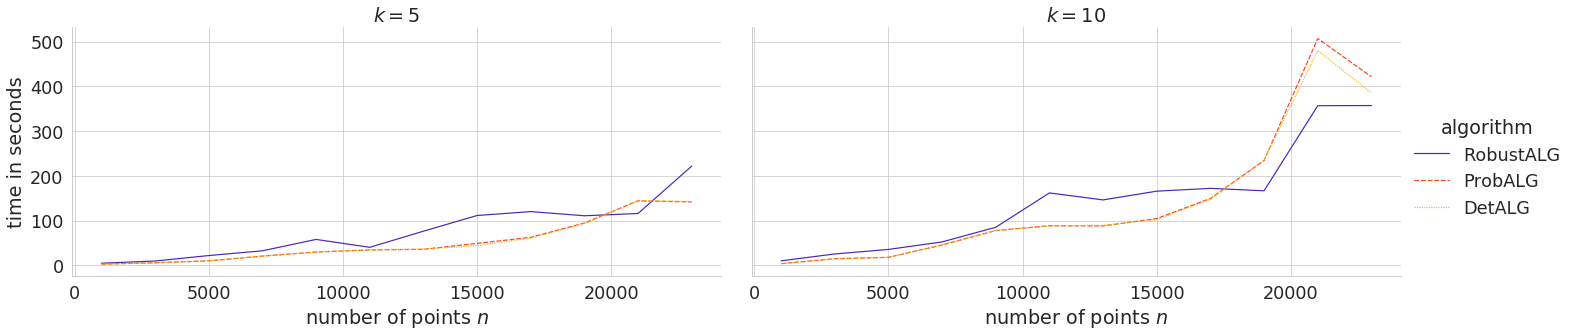

In [45]:
make_n_vs_time_plots(k5_10_csvs)